# LBA: Probability and Simulation

## Analysis

Solve the following problems, one of which you will write yourself! Full solutions require clear steps with written justifications as well as an interpretation of the result. There are multiple approaches to solving these problems; you are encouraged to try solving the problems using Python. For example, the scipy.stats library includes useful tools such as a z-score calculator.

### 1) Volleyball

“*There’s only a 35% chance that the team will win the point when they are serving.*” Contrast how Frequentists and Bayesians would interpret this statement (<200 words). [#probability]

#### What would a Frequentist say?

"Although I don't know the exact number of times the team will win the point when serving, I know that its value is fixed (not a random one). As a frequentist, I assert that the probable is that which happens often. Therefore, if I collect data from a sample of all volleyball games and estimate its expected value, 35% must be the relative frequency of winning while serving which is most consistent with the data."

#### What about the Bayesian?

"I agree that the mean is a fixed and unknown value, but I see no problem in representing the uncertainty probabilistically. I will do so by defining a probability distribution over the possible values of the expected value and use sample data to update the distribution that the team will win the point. Therefore, 35% is the degree of belief I have that the team will win the point when they are serving"

Frequentists argue that probability is fundamentally related to the frequencies of repeated events where the parameters of interest are fixed and unchanging, whereas Bayesians concede that probability is fundamentally related to our knowledge about an event i.e. the prior and likelihood of observed data and the state of the world can always be updated.

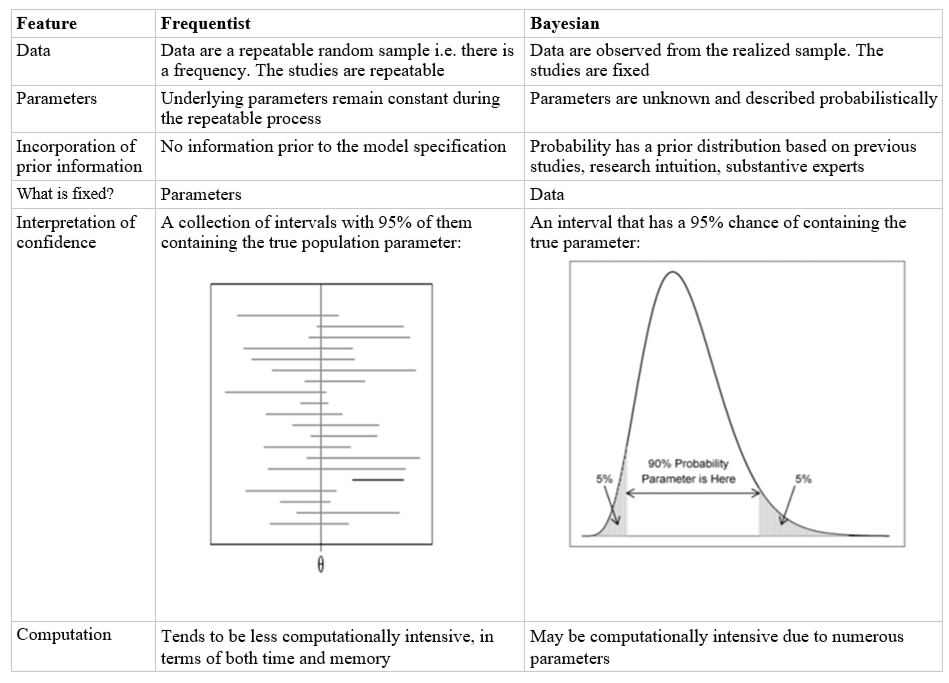

In [5]:
from IPython.display import Image

Image("Table.png")

### 2) Basketball

Tversky and his colleagues studied the records of 48 of the Philadelphia 76ers basketball games in the 1980–81 season to see whether a player had times when he was hot and every shot went in, and other times when he was cold and barely able to hit the backboard. The players estimated that they were about 25 percent more likely to make a shot after a hit than after a miss. In fact, the opposite was true—the 76ers were 6 percent more likely to score after a miss than after a hit. The authors report that the number of hot and cold streaks was about what one would expect by purely random effects. Assuming that a player has a fifty-fifty chance of making a shot and makes 20 shots a game, estimate by simulation (in Python) the proportion of the games in which the player will have a streak of 5 or more hits. Explain the result using a suitable interpretation of probability. [#probability, #simulation]

In [3]:
import random 

def shoot(p = 0.5):
    return 1 if random.random() < p else 0
            
def one_game(): 
        score = []
        shot = 0
        while shot < 20:
            score.append(shoot())
            shot += 1        
        return score
    
def n_game(n):
    game = 0
    desired = [1,1,1,1,1]
    streak = []
    while game < n:
        outcome = one_game()
        if str(desired)[1:-1] in str(outcome):
            streak.append(1)
        else:
            streak.append(0)
    
        game += 1
    
    return streak

record = n_game(10000000)

probability = record.count(1)/len(record)
print(probability)

0.249937


Since the free throw is a repeatable event, I propose that this probability is best viewed as a long run frequency. Therefore, the long-run average (i.e. in the limit as the number of shots approaches infinity) of a player having a streak of 5 or more hits is 25%. We assume as Frequentists that the repetitions occur independently and under essentially identical conditions. Note that in terms of relative frequency, there is no real difference between taking a shot 10 times in succession and taking shots all at once by 10 idential 76ers. The limitations of a frequentist approach is that we do now know what the limiting frequency will be, or that even one exists since it is not defined behorehand and we can't prove convergence. Furthermore, we cannot assign probabilities to single-case events.

Through the above Monte Carlo simulation, we were able to test various outcome possibilities. This is useful because analysis of possibilities should be done before the fact, especially since human beings do not have a very good intuition for random processes. (Tversky et al., 1985) Studies across a number of sports show that 'streaks' don't exist. Independent attempts may yield occasional long strings of success or failures such as in the case of making a streak of 5 or more hits, but these are not sufficient evidence to conclude a relationship between successive shot attempts.

On the other hand, Bayesian approaches are useful when it is difficult to assume that the event is repeatable and the collection of studies is a one-time phenomenon. In essence, a Bayesian would consider the 25% as the degree of belief that in 25%  of the games, the player will have a streak of 5 or more hits.  

#### Source:  
Gilovich, T., Vallone, R., & Tversky, A. (1985). The hot hand in basketball: On the misperception of random sequences. Cognitive Psychology, 17(3), 295–314. https://doi.org/10.1016/0010-0285(85)90010-6


### 3) Baseball

A rookie is brought to a baseball club on the assumption that he will have a 0.300 batting average based on his past performance. (Batting average is the ratio of the number of hits to the number of times at bat.) In the first year, he comes to bat 400 times during the season and his batting average is .348. Assume that his at bats can be considered Bernoulli trials with probability 0.3 for success. Give a both qualitative and quantitative argument about what is likely to happen to the player’s batting performance next season. Be sure to discuss the merits of any assumptions that are made. [#distributions]

#### Quantitative

We are using a binomial distribution to describe the mean and standard deviation of batting average. The assumptions relevant here include that each trial is independent. Although the belief of a streak or more accurately, 'hot-hand' persists, we have reasonable evidence to assume that the outcome of the player's fifth at-bat is unaffected by his performance in the first four at-bats. There are a fixed number of trials i.e. 400 and each at-bat can be considered a trial of the experiment. At each at-bat, there are two outcomes of interest – either the player gets a hit (success) or he doesn’t get a hit (failure). Since the player’s batting average is .300, the probability that he will get a hit in a single at-bat is p = .300 and this is the same for each trial. 

In [13]:
import math
from scipy import stats

np = 0.3*400
sd = math.sqrt(400*0.3*0.7)
nq = 0.7 * 400
print(np, nq)

120.0 280.0


When the sample size is large enough, the binomial distribution with parameters n and p can be approximated by the normal model. From the above cell, we can see that: $$np ≥ 10 $$ $$n(1-p)≥ 10$$ 

Therefore, there are at least 10 expected successes and failures and a normal approximation is appropriate.

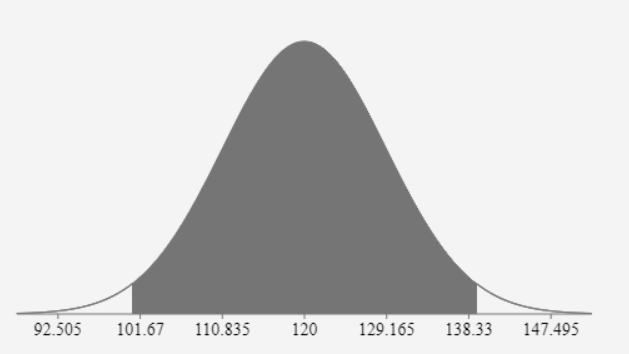

In [11]:
Image("Area.png")

In [15]:
prob = ((stats.norm(np, sd).cdf(139.2)) - 0.5)*2
print(prob)


0.963819383256


According to the normal approximation, the probability that the player will deviate from his batting average more than the same amount next season is 0.036. Therefore, there is a 0.963 likelihood that his batting average next season is between 100.8 and 139.2.

#### Qualitative

Because a player’s batting average in a given year of his career is an average of a very large number of statistically independent random variables, it might be expected to be normally distributed around its expected value. From this, the conclusion follows that the likelihood the player's batting performance for the next season is closer to the career batting average (population mean) is 0.963.

This makes sense because a batting average of 0.348 is exceptional, but very unlikely. Therefore, following an extreme random event, the next random event is likely to be less extreme. This phenomena is called regression to the mean. 

Although baseball's best hitters can exceed 0.300, the league-wide batting average is typically around .260 ('What is a Batting Average (AVG)?', n.d.). Intuitively, most players who do much better than their peers are also performing better than their own career averages. These atheletes tend to be above average in both skill and in luck and only the skill portion is relevant to future performance. The regression-toward-the-mean explanation is that their skills did not deteriorate, but rather that their unusually good performance as a result of chance during the first season exaggerated their skills. 

Interestingly, since batting average regress towards the mean, baseball performances measures such as the batting average are considered imperfect assessments of underlying skill. Schall et al.  suggests that by using 'correlation coefficients estimated from earlier seasons', predictions of batting averages can be improved to show reduced regression to the mean. 

Furthermore, the greater the size of trials, the more probable it will be that his battling average is closer to the population mean. This is because according to the central limit theorem, as the sample size exceeds 30, we closely approximate a normal distribution. Conversely, smaller sample sizes lead to a greater standard error and a wider distribution, such that the sample means are less likely to be clustered around the mean. This is because the Gaussian distribution is constrained by an area of 1. Therefore, for larger samples (400 at-bats), it is more probable that the mean is closer to the expected value. 

The degree to which the batting average is expected to regress towards the mean depends on the relative contribution of chance to the outcome: the greather the role of chance, the more the regression towards the mean. However, regression toward the mean does not occur for every individual i.e. we cannot entirely predict the athlete's performance in the next season. 

#### Source:

What is a Batting Average (AVG)? | Glossary. (n.d.). Retrieved February 4, 2018, from http://m.mlb.com/glossary/standard-stats/batting-average

Schall, T., & Smith, G. (2000). Do baseball players regress toward the mean? The American Statistician; Alexandria, 54(4), 231–235.


### 4) Ski jumping

The distribution of all observed competitive ski jumps in Zakopane, Poland during 2010-2016 is nearly normal with an average jump distance of 120.5 m and a standard deviation of 10 m. [#distributions]

1. What is the probability that the next random jumper will jumper further than 135 m?
2. What is the probability that the mean distance of the next 15 random jumpers is further than 135 m?
3. Could you still estimate the probabilities above if the distribution was actually negatively skewed by the presence of some shorter distance jumps?


In [37]:
m = 120.5
sd = 10

prob = 1 - (stats.norm(m, sd).cdf(135))

print('The probability that the next random jumper will jump further than 135 m is', prob)

se = 10/math.sqrt(15)

prob1 = 1 - (stats.norm(m, se).cdf(135))

#We are assuming that if we take a samples of size 15 from the population many many times 
print('The probability that the mean distance of the next 15 random jumpers is further than 135 m is', prob1)

The probability that the next random jumper will jump further than 135 m is 0.0735292596096
The probability that the mean distance of the next 15 random jumpers is further than 135 m is 9.7812806743e-09


No, because we can't assume that the distribution of sample means is well approximated by a normal model since the data are strongly skewed and the sample size is very small (less than 30). The average of our sample means is no longer the population mean as the central limit theorem doesn't hold.

The central limit theorem (CLT) indicates that if the sample size is sufficiently large (at least 30), the means of samples obtained using a random sampling with replacement are distributed normally regardless of the shape of the population distribution. Another condition for the CLT is independence onf observation. Generally, since the probability of ski jumping a certain distance stays the same regardless of the outcomes of previous ski jumps, we can assume that this conditions holds true. 

According to the CLT, even if the population distribution is skewed, the sampling distribution will be approximately normally distributed if the sample size is large enough. The larger each sample, the less spread out around the true population mean this distribution will be. The more closely the sample means gather symmetrically around the population mean, they have a corresponding reduction in the standard error. However, if our sample is strongly skewed, the CLT no longer applies and we cannot estimate the probabilities accurately. 

In principle, the researcher could decide to exclude extreme outliers to reduce skewness though such reasons need to be explicitly stated and its implications thoroughly considered. In such instances, the potential effects of any psychological biases e.g. seeking confirmatory information and giving dimished weight to evidence that contradicts one's positions (#confirmationbias) need to be carefully checked. 


### 5) Construct your own problem.

Write (and solve) a probability problem based on the data collected at the sporting event you attended. The analysis should contain multiple parts, ***enough to demonstrate deep knowledge of all three HC’s: #probability, #distributions, and #simulation.*** It must also involve computations done ***both analytically and via simulation***. Note that the same problem can be approached using multiple techniques. First discuss the context: explain the game you attended and what you measured. Also discuss all assumptions made and any potential flaws in your analysis. The (mostly complete) model problem linked in the assignment instructions is an example of what you could do. Do not copy this example exactly. If you’d like more ideas on what you could calculate, use textbook problems and class activities for inspiration, and brainstorm with your classmates or your professor.

**Notes**:

- The calculation may require some information not obtained in your data collection. You can make additional assumptions as long as the problem still uses your observation in some way.
- Your problem and solution can have multiple parts but should not be much longer than the model problem provided.
- Choose an appropriate level of difficulty. The problem should be solvable by your classmates, and WILL be solved by your classmates in lesson 3.2! So, if your analysis involves a distribution or concept not covered in class, include an APA citation as well as a description of the distribution and its relevance for the problem.
- Don’t forget to include a photo of you at the game!

I attended the men's basketball match between Arizona State Sun Devils and California Golden Bears	College	in Haas Pavilion, Berkeley. 

The objective of a basketball game is for one team to score more than the opposing team by the end of play time. Teams are made of 15 players with 5 players on the court at any one time. Shots made outside the arc score 3 points, while shots made inside the arc score 2 points. Any free throws score 1 point. We will assume the outcome of the game is the result of a series of random trials.

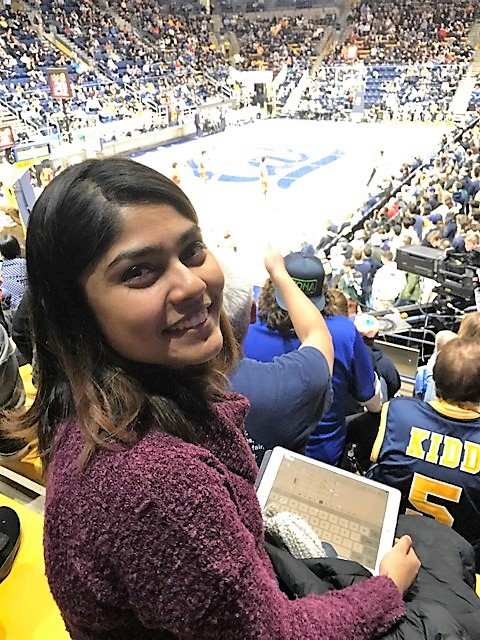

In [61]:
from IPython.display import Image
filename = "CalBears.jpg" #add the file name for the photo of you at the game
Image(filename)

#### Assumptions and Limitations

Here, each shot is a Bernoulli trial and trials are assumed to be independent:
the outcome of a second attempt is not affected by the first attempt. There is a repeated, fixed number, n, of trials. In this case, n is the number of shots taken. Each trial has two outcomes: basket (success) or no basket (failure). The probability of success are assumed the same (identical) for each trial since free throws are always shot from the same distance and there is no defensive pressure. Each time the player lines up at the free throw line, he has the same probability of success. These probabilities are different for free throws and three-pointers, as determined by career statistics. 

However, the assumption of identical probabilities may be problematic for field goals, which are shot from varying distances and this can affect outcomes. Nonetheless, the law of large numbers states that for sufficiently large number of independent trials, the effect of such extraneous factors cancels each other out. As a result, our analysis holds.

Here, we are going to use career statistics for each athlete instead of my observations at the game since the former average figures are taken over a longer period of time i.e. their entire professional career. According to the law of large numbers, they are likely to be closer to the expected values for each outcome. For instance, if a player has an intrinsic ability of 80% to make a free throw as the number of free throw attempts gets very large, the percent of successes will likely converge to 80% over their career. 

1) If Nick Hamilton shoots 3 free throws in a game, what is the probability that he will make at most 2 of them?

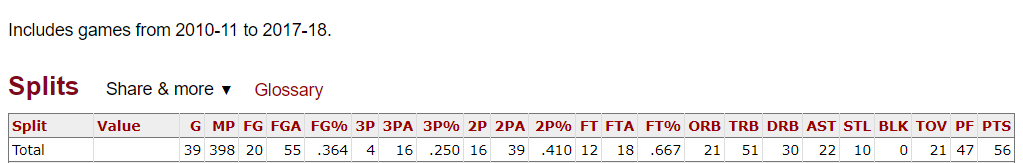

In [43]:
Image("NickHamilton2.png")

In [60]:
prob = stats.binom.cdf(2, 3, 0.667, loc = 0)
print(prob)

0.703259037


2) Does Nick Hamilton have better odds of making 3 free throws in a row or one three pointer? 

In [59]:
prob2 = (stats.binom.pmf(3, 3, 0.667, loc = 0))
print(prob2)

0.296740963


If we imagine a billion Nick Hamilton's all taking a first free throw, we would expect on average that 66.7% would make that first free throw and the remaining would miss it. Of the ones that made the first one, we would expect 66.7% to make that first free throw and the second free throw and similarly of the 66.7% of the Nick Hamilton's that made the first and second free throw would also make the third free throw. 

Therefore, Nick Hamilton has a probability of 0.25 to score one three pointer while a probability of 0.297 of making 3 free throws in a row. Therefore, he has better odds of making 3 free throws in a row.

3) Nick Hamilton and Remy Martin attempt 3 free throws. Their probability of making a shot is 66.7% and 76.7% respectively. Which player has a higher probability of making at least two shots?

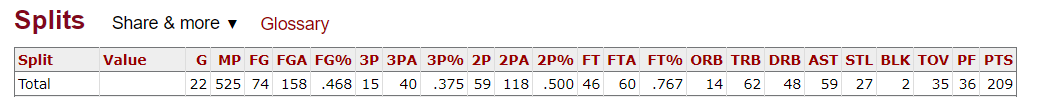

In [62]:
Image("RemyMartin.png")

In [64]:
nick = stats.binom.cdf(2,3,0.667, loc = 0)
remy = stats.binom.cdf(2,3,0.767, loc = 0)

print(nick)
print(remy)

0.703259037
0.548782337


Nick Hamilton has a higher probability of making at least two shots.

4) How much spread is there in 10000 samples of size 100 Marcus Lee free throws? In other words,  what is the standard error of the proportion?

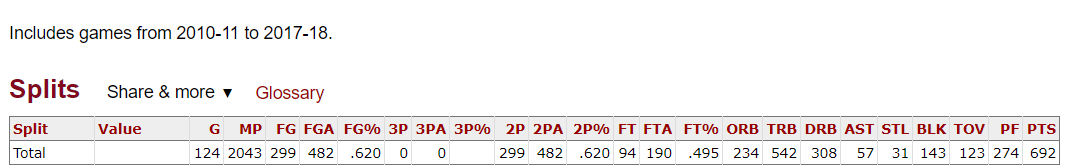

In [136]:
Image("MarcusLee.png")

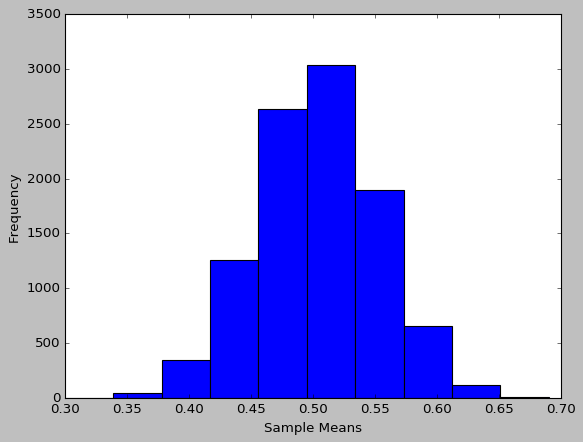

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

def score(p = 0.495):
    return 0 if random.random() < p else 1

def hundred ():
    hits = []
    shots = 0
    while shots <100:
        hits.append(score())
        shots += 1
    return hits.count(1)/shots #sample percentage from 100 free throws

def runsim(n):
    sim = 0
    samplemeans = []
    while sim <n:
        samplemeans.append(hundred())
        sim += 1
    return samplemeans

data = runsim(10000)

plt.hist(data)
plt.ylabel('Frequency')
plt.xlabel('Sample Means')
plt.show()

In [138]:
print('The standard deviation of sample means is', np.std(data))

The standard deviation of sample means is 0.0502548067353


In [135]:
#Method 2

sesp = math.sqrt((0.495*(1-0.495))/100) #standard error of sample proportion
print(sesp)

0.04999749993749688


#### Source:

The Standard Error of a Proportion. (n.d.). Retrieved February 5, 2018, from http://www.jerrydallal.com/lhsp/psd.htm


We wanted to know how much spread there was in the sample proportion. We used both Monte Carlo simulation strategy and analytical methods. In the former, we repeatedly resampled and thereby obtained an approximation to the standard error of the sample proportion as 0.05. Analytical methods yielded an answer of approximately 0.05 as well.

### 6) Reflection

Write a short reflection paragraph (< 200 words) about the insights you gained pertaining to the HCs used in this assignment. Which 1-2 learning principle(s) were the most beneficial for deepening your understanding of the connection between sports, probability, distributions, and simulation? [#scienceoflearning]

Throughout this assignment, learning through storytelling was a beneficial strategy to understand the distinction between Bayesian and Frequentist interpretations of statistics. In practice, I created two active agents in my mind, referring to one as "Frequentist Frank" and the other as "Bayesian Bella" as characters I would learn more about while preparing for the assignment. Representing chunked information through active agents facilitates perception and recall (Kahneman, 2011). In particular, each piece of information can serve as a retrieval cue to the next related piece of information for the agent, creating an 'interlocking sequence of associations' (Kosslyn, 2017) and I was able to access these mental representations of abstract concepts easily after storytelling.

Additionally, interleaved practice was very useful. By spacing out my studying over time instead of a single crammed session, I felt more confident engaging in the material with a clear understanding of the nuances of #probability and #distribution. For example, on one occasion I was struggling with the law of large numbers and decided to analyze a speech about racial inequality for my Multimodal Communications assignment. During the process, I had a revelation: getting the actual probability that an individual of color will suffer abuse by the police in the US is difficult because it requires gathering data on every single encounter of that subpopulation with law enforcement officers. Therefore, if the sample size is large enough, it will approach the expected value, and statistical analysis *is* a reliable method to characterize institutional racism. Geared with this new appreciation, I was far more motivated to work on my assignment, and it was a valuable learning experience. 

#### Source: 

Kahneman, D. (2011). Thinking, fast and slow (First edition.). New York: Farrar, Straus and Giroux.


Kosslyn, S. M. (2017). The science of learning. In S. M. Kosslyn & B. Nelson (Eds.), Working universities: Minerva and the future of higher education. Cambridge, MA: MIT Press. Retrieved from https://course-resources.minerva.kgi.edu/uploaded_files/mke/YRpz1r/chapter11-science-learning.pdf
